# Behaviour analysis of bonsai VR and 2p

Once you temporally align the behav and funcimg data, it is time to inspect the dataset and do cool stuff!

In [16]:
import numpy as np
import importlib
import parse_bonsai_functions as parse_bonsai_functions
import parse_nwb_functions as parse_nwb_functions

importlib.reload(parse_bonsai_functions)
importlib.reload(parse_nwb_functions)

import cellTV_functions as celltv

## Parse mouse and date info into root session folder

In [ ]:
PREPROCESSED_BEHAV = 'preprocessed_Oct2025v3' #'preprocessed_behav_Nov2025'

mouse_id = "004"
date = "20251024"
root = f"/Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/{PREPROCESSED_BEHAV}/derivatives" # Use preprocessed dir here this time
session_path = parse_nwb_functions.find_base_path(mouse_id, date, root)

Found folder: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-006/ses-full011_date-20251024T154354


## Load all the relevant files
- settings (session only)
- aligned NWB file

In [ ]:
ses_settings, _ = parse_nwb_functions.load_settings(session_path)
nwb_path = parse_nwb_functions.find_nwbfile(session_path)

IndexError: list index out of range

## Example: Use Pynapple to read and analyze data
Here is one example of how you can interact with stored data, using `pynapple`. pynapple has lots of functions to align two datasets with different temporal resolution/scale.
https://pynapple.org/user_guide/03_core_methods.html

In [4]:
import pynapple as nap

In [5]:
data = nap.load_file(nwb_path)
print(data)

vrabcd_2p_preprocessed_sub-003_ses-1LM014_date-20251024T104524
┍━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━┑
│ Keys                         │ Type      │
┝━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━┥
│ RoiResponseSeriesChan1Plane0 │ TsdFrame  │
│ NeuropilChan1Plane0          │ TsdFrame  │
│ DeconvolvedChan1Plane0       │ TsdFrame  │
│ TwoPhotonSeriesGreen         │ TsdTensor │
│ TrialLickedReward            │ Tsd       │
│ TrialAutoReward              │ Tsd       │
│ Treadmill                    │ Tsd       │
│ SyncTTL                      │ Tsd       │
│ Position                     │ Tsd       │
│ ManualReward                 │ Tsd       │
│ Licks                        │ Tsd       │
│ Events_release               │ Tsd       │
│ Events_prepare               │ Tsd       │
│ Events_flush                 │ Tsd       │
┕━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━┙


In [6]:
# And you can inspect data...
# 2p
print(data['RoiResponseSeriesChan1Plane0'])

Time (s)              0         1         2        3         4  ...
--------------  -------  --------  --------  -------  --------  -----
3.3814          28.8471   68.5847   29.7741  50.2838   81.0352  ...
3.40387191      99.417    45.1936   58.11    48.9306   65.0829  ...
3.42634382      32.8778  119.625    43.2531  32.0995   66.6107  ...
3.44881573      56.9585   54.2589   35.0968  76.2256   78.8453  ...
3.47128764      27.3707  118.884    32.3471  47.3973   51.3463  ...
3.493759551     71.5834  166.773    65.6974  59.7558   45.3308  ...
3.516231461     70.0908   41.2507   72.7688  47.0932   48.4608  ...
...                                                             ...
1845.920725843  45.021    86.2655   76.1683  45.6851   79.608   ...
1845.943197753  45.152   103.602    70.5563  53.0656   69.3889  ...
1845.965669663  87.669    35.3493   55.6959  52.1642   63.5117  ...
1845.988141573  34.9058   51.7673   39.7412  74.6013  103.091   ...
1846.010613483  26.9322   62.1507   27.0134  2

In [7]:
# behav - binary
print(f'Animals got {np.sum(data['TrialLickedReward'])} rewards in this session')
print(data['TrialLickedReward'])

Animals got 77 rewards in this session
Time (s)
--------------  --
2.803123673      0
2.825345895      0
2.847568117      0
2.869790339      0
2.892012562      0
2.914234784      0
2.936457006      0
...
1821.914234784   0
1821.936457006   0
1821.958679228   0
1821.98090145    0
1822.003123673   0
1822.025345895   0
1822.047568117   0
dtype: int64, shape: (81867,)


In [8]:
# behav - continuous
print(data['Treadmill'])

Time (s)
--------------  ----------
2.803123673     -0.0150796
2.825345895     -0.0226195
2.847568117     -0.0301593
2.869790339     -0.0376991
2.892012562     -0.0452389
2.914234784     -0.0150796
2.936457006      0.0150796
...
1821.914234784   0
1821.936457006   0
1821.958679228   0
1821.98090145    0
1822.003123673   0
1822.025345895   0
1822.047568117   0
dtype: float64, shape: (81867,)


## Example: Use NWBHDF5IO to read and analyze data
But Pynapple is known to have limited varieties of functions

In [9]:
pd1 = parse_nwb_functions.get_ttl_onsets(nwb_path, 'Photodiode1ONTTL')
# pd2 = parse_nwb_functions.get_ttl_onsets(nwb_path, 'Photodiode3ONTTL')
print(f'Photodiode 1 detected {len(pd1)} white squares')
# print(f'Photodiode 2 detected {len(pd2)} white squares')

TTL onsets recorded by NIDAQ:
          event_name                          event_type_description  \
id                                                                     
0   Photodiode1ONTTL  The onset times of the Photodiode1ONTTL event.   
1   Photodiode3ONTTL  The onset times of the Photodiode3ONTTL event.   
2     CameraFrameTTL    The onset times of the CameraFrameTTL event.   
3         MODD1ONTTL        The onset times of the MODD1ONTTL event.   
4         MODD2ONTTL        The onset times of the MODD2ONTTL event.   

    pulse_value  
id               
0             1  
1             1  
2             1  
3             1  
4             1  
Retrieve Photodiode1ONTTL
Photodiode 1 detected 164 white squares


In [10]:
mean_img, image_mask, ROICentroids = parse_nwb_functions.get_s2pstat_nwb(nwb_path)
masks = celltv.concat_masks(image_mask)

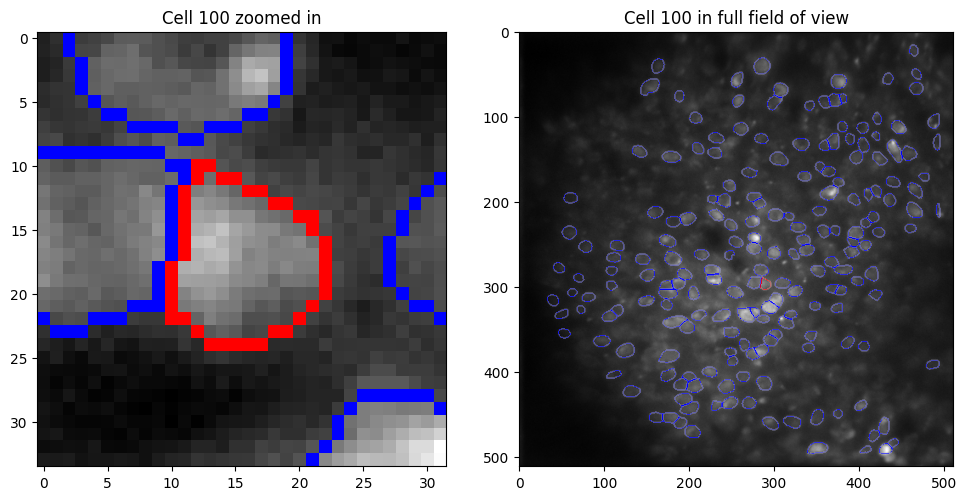

In [12]:
cell_id = 100
celltv.show_cell_fov(cell_id, mean_img, masks)